In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Fish_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/data/po_freeglorys_0.25x30d_1998_2019/skj_ref2018_freeglorys_reanalysis_025x30d_vgpm_Fref.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 7776000,
 'delta_time': 86400,
 'output_delta_time': 2592000,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': True,
 'forcing_files': ({},
  {'ocean': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/IkaSim_Example_025_30/IkaSim_Example_025_30_90d.nc'}),
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 1000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age',
 'start_dyna

In [4]:
my_sim.loadFields()

In [5]:
# my_sim.oceanToNetCDF("./../data/ikamoana_data", to_dataset=True)

In [6]:
my_sim.initializeParticleSet(particles_class=IkaFish,
                             particles_number=10000,
                             method="start_cell")

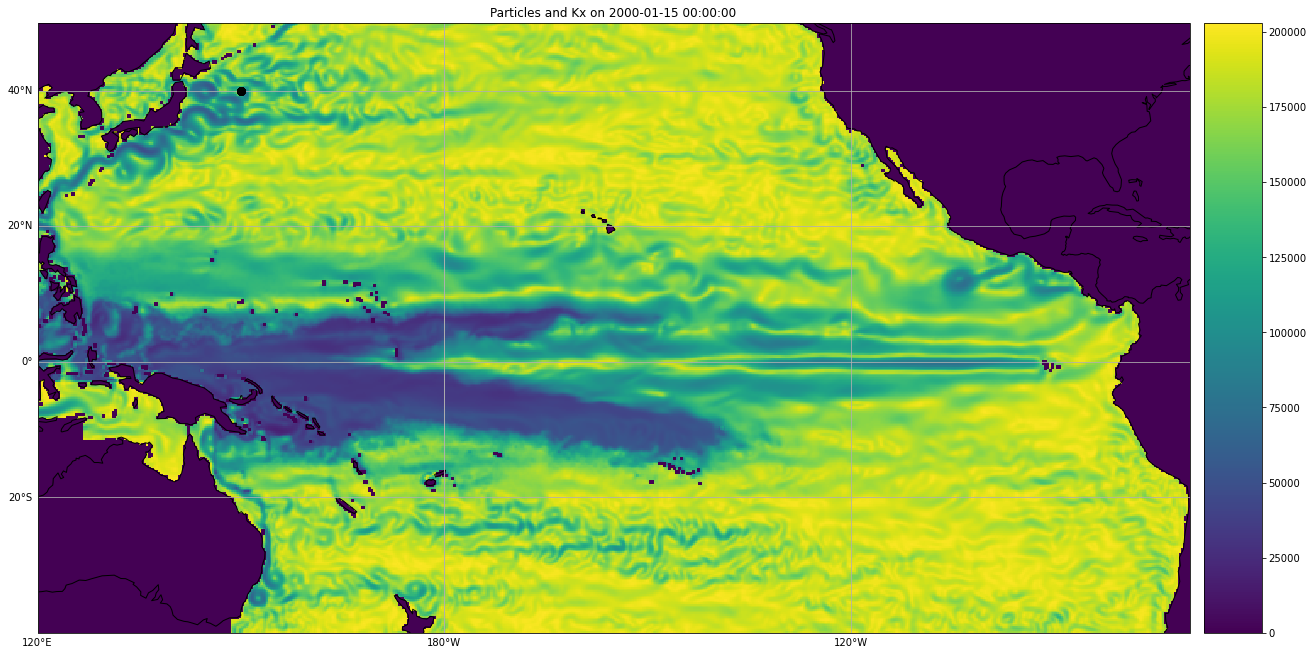

In [7]:
my_sim.fish.show(field=my_sim.ocean.Kx)

In [8]:
my_sim.runKernels()

INFO: Compiled ArrayIkaFishCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollLandBlock ==> /tmp/parcels-1000/lib347a00a588888808861f5d85436e6a9d_0.so


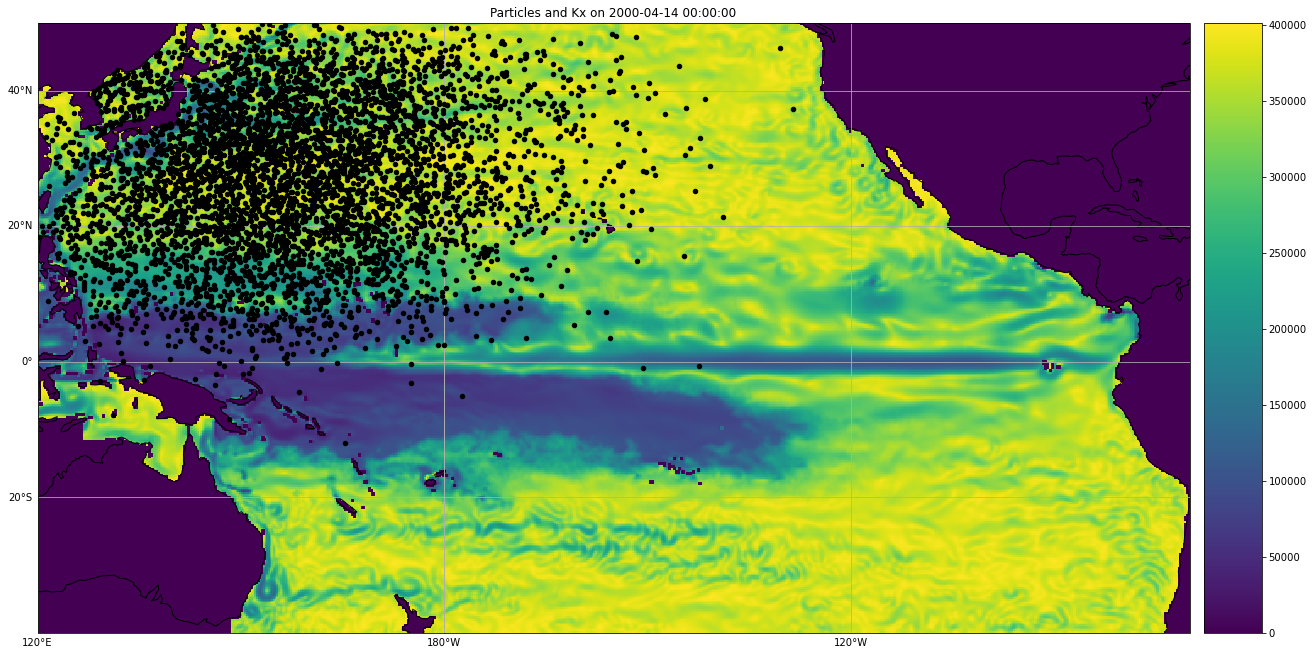

In [9]:
my_sim.fish.show(field=my_sim.ocean.Kx, with_particles=True)

---